## Importing Libs

In [1]:
import numpy as np
import pyross
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import optimize

## Importing Data

In [2]:
plt.rcParams.update({'font.size': 22})
M  = 16  ## number of age-groups
my_data = np.genfromtxt ('age_structed_morocco.csv', delimiter =',', skip_header =1)
aM , aF = my_data[: , 1] , my_data[: , 2]
Ni0 = aM + aF
Ni = Ni0[: M ] # consider first M age groups in data
N = np.sum( Ni ) # total population is sum over all age groups
# get individual contact matrices
CH = np.genfromtxt ('home_contact_matrix_morocoo.csv', delimiter =',', skip_header =1)
CW = np.genfromtxt ('work_contact_matrix_morocco.csv', delimiter =',', skip_header =1)
CS = np.genfromtxt ('school_contact_matrix_morocco.csv', delimiter =',', skip_header =1)
CO = np.genfromtxt ('other_locations_contact_matrix_morocco.csv', delimiter =',', skip_header =1)
# without interventions , the contact matrix is the sum of those
C = CH + CW + CS + CO
my_datas = np.genfromtxt('daily_cases.csv', delimiter=',', skip_header=1)
day = my_datas[:,0]
cases = my_datas[:,2] 

## Age structures

In [3]:
marM = 100*aM/np.sum(2*aM)
marF = 100*aF/np.sum(2*aF)

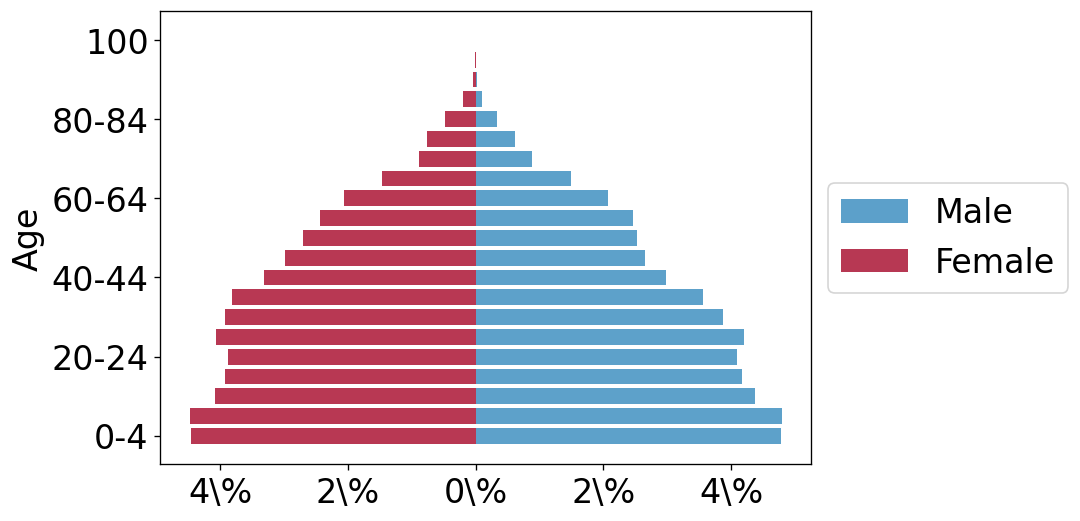

In [4]:
fig = plt.figure(figsize=(7,5), dpi=120);  
plt.rcParams.update({'font.size': 20})

sAge = np.arange((np.size(aM)))
plt.barh(sAge, marM, color="#348ABD", label='Male', alpha=0.8)
plt.barh(sAge, -marF,color='#A60628', label='Female', alpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.yticks(np.arange(0, 21, 4), ('0-4', '20-24', '40-44', '60-64', '80-84', '100'));
plt.xticks(np.arange(-4, 5, 2), ('4\%', '2\%', '0\%', '2\%', '4\%'));
plt.ylabel('Age')
fig.savefig('Morroco_Age_structures.pdf',bbox_inches='tight')

## Contact structures

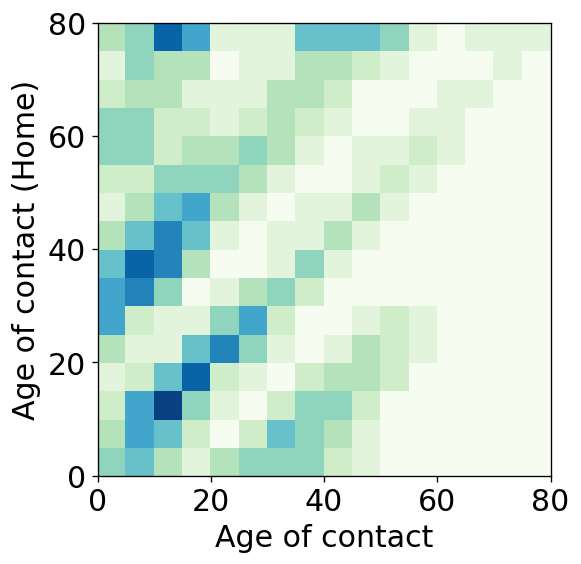

In [5]:
fig = plt.figure(figsize=(7,5), dpi=120);  
plt.rcParams.update({'font.size': 18})


plt.pcolor(CH, cmap=plt.cm.get_cmap('GnBu', 10)); plt.axis('square')# plt.clim(-0*np.max(MU), 0.3*np.max(MU));
plt.locator_params(nbins=6)
plt.xticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.yticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.ylabel('Age of contact (Home)')
plt.xlabel('Age of contact')
fig.savefig('Contact_Home.pdf',bbox_inches='tight')

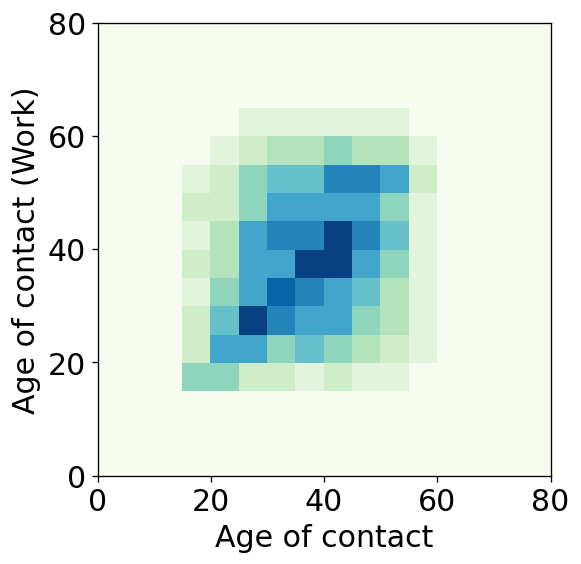

In [6]:
fig = plt.figure(figsize=(7,5), dpi=120);  
plt.rcParams.update({'font.size': 18})


plt.pcolor(CW, cmap=plt.cm.get_cmap('GnBu', 10)); plt.axis('square')# plt.clim(-0*np.max(MU), 0.3*np.max(MU));
plt.locator_params(nbins=6)
plt.xticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.yticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.ylabel('Age of contact (Work)')
plt.xlabel('Age of contact')
fig.savefig('Contact_Work.pdf',bbox_inches='tight')

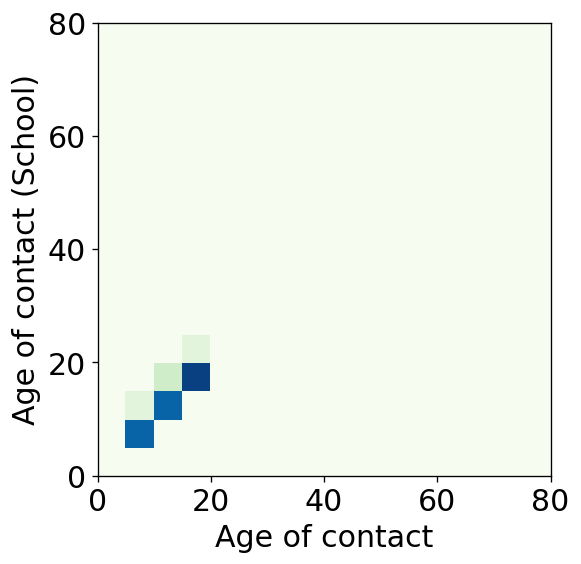

In [7]:
fig = plt.figure(figsize=(7,5), dpi=120);  
plt.rcParams.update({'font.size': 18})


plt.pcolor(CS, cmap=plt.cm.get_cmap('GnBu', 10)); plt.axis('square')# plt.clim(-0*np.max(MU), 0.3*np.max(MU));
plt.locator_params(nbins=6)
plt.xticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.yticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.ylabel('Age of contact (School)')
plt.xlabel('Age of contact')
fig.savefig('Contact_School.pdf',bbox_inches='tight')

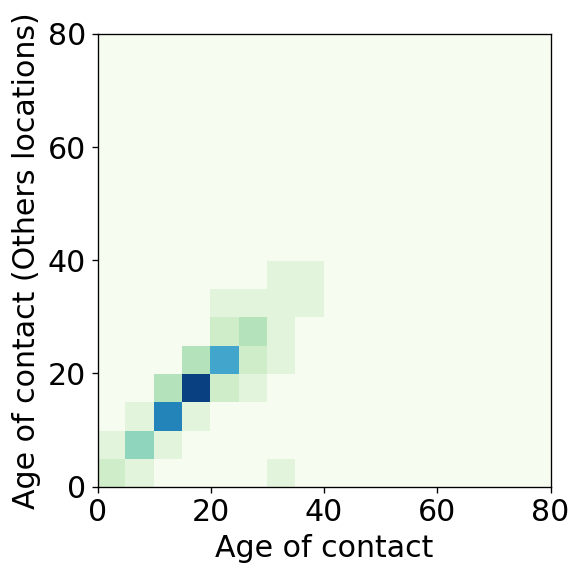

In [8]:
fig = plt.figure(figsize=(7,5), dpi=120);  
plt.rcParams.update({'font.size': 18})


plt.pcolor(CO, cmap=plt.cm.get_cmap('GnBu', 10)); plt.axis('square')# plt.clim(-0*np.max(MU), 0.3*np.max(MU));
plt.locator_params(nbins=6)
plt.xticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.yticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.ylabel('Age of contact (Others locations)')
plt.xlabel('Age of contact')
fig.savefig('Contact_Others.pdf',bbox_inches='tight')

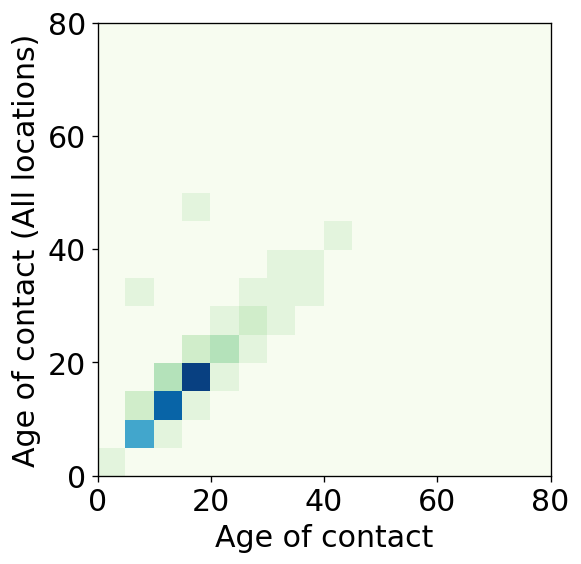

In [9]:
fig = plt.figure(figsize=(7,5), dpi=120);  
plt.rcParams.update({'font.size': 18})


plt.pcolor(C, cmap=plt.cm.get_cmap('GnBu', 10)); plt.axis('square')# plt.clim(-0*np.max(MU), 0.3*np.max(MU));
plt.locator_params(nbins=6)
plt.xticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.yticks(np.arange(0, 17, 4), ('0', '20', '40', '60', '80'));
plt.ylabel('Age of contact (All locations)')
plt.xlabel('Age of contact')
fig.savefig('Contact_All.pdf',bbox_inches='tight')

## Model Validation

In [10]:
alpha= 0.3              # fraction of asymptomatics
gE   = 1/2.75           # recovery rate of exposeds
kI   = 10;               # # of stages of I class
kE   = 10;                # # of stages of E class 
gIa  = 1./7              # recovery rate of asymptomatic infectives 
gIs  = 1./7          # recovery rate of symptomatic infectives
fsa  = 0.5              # fraction of symptomatics who self-isolate


# We start with one symptomatic infective in each of the age groups 6-13,


# initial conditions    
Is_0 = np.zeros((M));  Is_0[6:13]=1
Ia_0 = np.zeros((M))
E_0  = np.zeros((M))
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0+ E_0)


# the contact structure is dependent of time 
def contactMatrix(t):
    if 0 <= t <= 20 :
        return C                           # No NPI yet
    elif 20 < t <= 110 :
        return CH+0.4*CW+0.11*CO           # Lockdown in morroco 
    elif t > 110 :
        return CH+0.7*CW+0.3*CO+ 0.1*CS    # End of Lockdown, but still some restrictive measures


# duration of simulation and data file
Tf=281;  Nf = Tf+1

Tf_fit = 282; Nf_fit = Tf_fit+1;
cases_fit = cases[:Tf_fit+1]

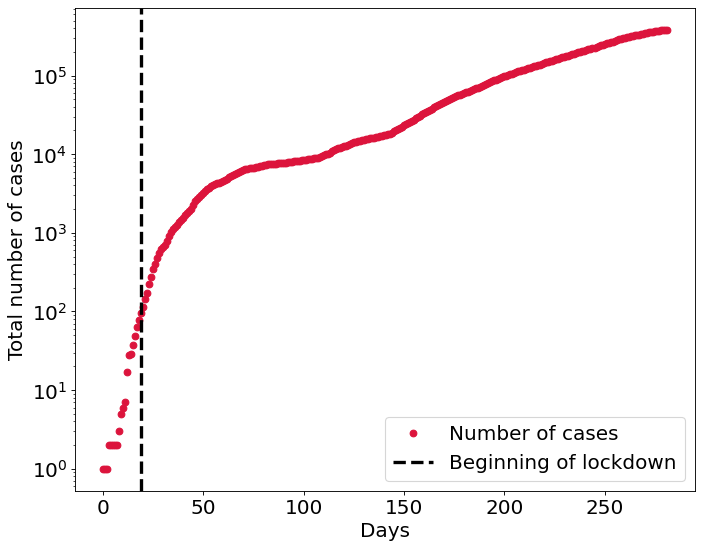

In [11]:
# The lockdown in the Morocoo started on 2020-03-23, which corresponds to the 20th datapoint
# (which has index 19)
lockdown_start = 19

fig,ax = plt.subplots(1,1, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax.plot(cases,marker='o',ls='',color='crimson',
        label='Number of cases')
ax.axvline(lockdown_start,
           lw=3,ls='--',color='black',
           label='Beginning of lockdown')
ax.set_xlabel('Days')
ax.set_ylabel('Total number of cases')
ax.set_yscale('log')
ax.legend(loc='best')
fig.savefig('Morroco_cases.pdf',bbox_inches='tight')
plt.show()
plt.close()

In [12]:
def findBetaIs(x):
    #
    # Define model and run simulation
    parameters = {'beta':x, 'gE':gE, 'gIa':gIa, 'gIs':gIs,
                  'fsa':fsa, 'alpha':alpha}
    model = pyross.deterministic.SEIR(parameters, M, Ni)
    data=model.simulate(S_0, E_0,  Ia_0, Is_0, 
                        contactMatrix, Tf, Tf+1)
    Is = (model.Is(data))
    summedAgesIs = Is.sum(axis=1)
    
    #
    # calculate mean-squared deviation between simulated cases and given dataset
    diff = (cases_fit-summedAgesIs)
    error = np.sum( diff**2 )
    return error

In [13]:
# scan parameter space to find good initial value for minimiser

beta_arr = np.logspace(-2,-0.3,num=41)
values = np.zeros_like(beta_arr)
for i,beta in enumerate(beta_arr):
    values[i] = findBetaIs(beta)

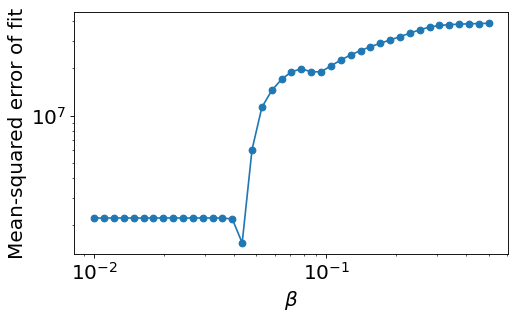

In [14]:
# visualise
fig,ax = plt.subplots(1,1, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
ax.plot(beta_arr,np.sqrt(values),marker='o')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Mean-squared error of fit')
fig.savefig('Beta_SEIR.pdf',bbox_inches='tight')
plt.show()
plt.close()

In [15]:
min_beta = beta_arr [ np.argmin( values) ]
print('starting guess for minimiser:',min_beta)
beta0  = min_beta

# we use the datapoint at the beginning of the lockdown as reference
reference_index = 19

# define function for minimiser and run minimisation
minimising_func = lambda x: findBetaIs(x)
sol1 = optimize.root(minimising_func,beta0) 
print('Is only best fit: ', sol1.x)
x=sol1.x[0]
parameters = {'beta':x, 'gE':gE, 'gIa':gIa, 'gIs':gIs,
                  'fsa':fsa, 'alpha':alpha}
model = pyross.deterministic.SEIR(parameters, M, Ni)

data=model.simulate(S_0, E_0,  Ia_0, Is_0,  contactMatrix, Tf, Nf)

starting guess for minimiser: 0.04340102636447438
Is only best fit:  [0.04474645]


In [16]:
plt.rcParams.update({'font.size': 22})
# Compare total number of cases to dataset used for fitting

Is = (model.Is(data))
summedAgesIs = Is.sum(axis=1)

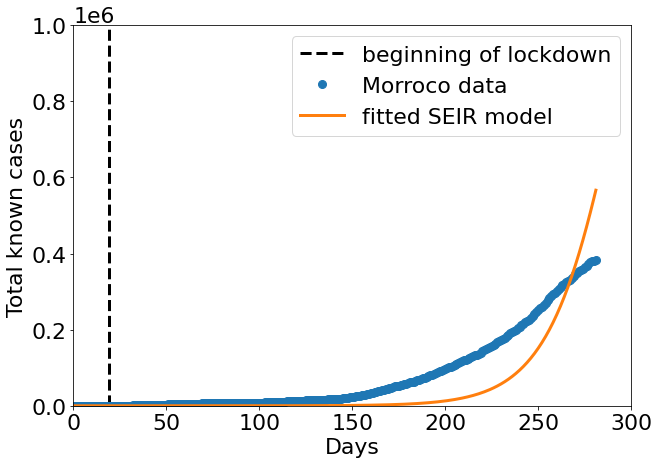

In [17]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.axvline(19,lw=3,ls='--',
           color='black',label='beginning of lockdown')
ax.plot(cases,marker='o',ls='',markersize=8,
       label='Morroco data')
ax.plot(summedAgesIs,lw=3,
       label='fitted SEIR model')
ax.set_xlabel('Days')
ax.set_ylabel('Total known cases')
ax.set_ylim(0,1e6)
ax.set_xlim(0,300)
ax.legend(loc='best')
fig.savefig('Morroco_predicted_cases_3.pdf',bbox_inches='tight')
plt.show()
plt.close()

## Model Prediction

 To study the impact of the state's interventions, three simulations were carried out for the next 500 days. The first one consists on the fact that Morocco commits itself to a total lockdown like the one of China. In the case of the second, it is to say that there will be no changes on the INPs taken by the state these days. The third scenario simulates the fact that Morocco is not going to implement any intervention. The different contact matrices are as follows:

In [41]:
model_1 = pyross.deterministic.SEIR(parameters, M, Ni)

#1st Simulation : Total Lockdown
def contactMatrix1(t):
    if 0 <= t <= 20 :
        return C
    elif 20 < t <= 110 :
        return CH+0.4*CW+0.11*CO
    elif 110 < t <= 282 :
        return CH+0.7*CW+0.3*CO+ 0.1*CS
    elif t > 282:
        return CH

#2nd Simulation : No Changes in NPI
def contactMatrix2(t):
    if 0 <= t <= 20 :
        return C
    elif 20 < t <= 110 :
        return CH+0.4*CW+0.11*CO
    elif t > 110 :
        return CH+0.7*CW+0.3*CO+ 0.1*CS

#3rd Simulation : No NPI
def contactMatrix3(t):
    if 0 <= t <= 20 :
        return C
    elif 20 < t <= 110 :
        return CH+0.4*CW+0.11*CO
    elif 110 < t <= 282 :
        return CH+0.7*CW+0.3*CO+ 0.1*CS
    elif t > 282:
        return C

Tf_1 = 700
Nf_1 = Tf_1+1

In [19]:
data_1=model_1.simulate(S_0, E_0,  Ia_0, Is_0,  contactMatrix1, Tf_1, Nf_1)
data_2=model_1.simulate(S_0, E_0,  Ia_0, Is_0,  contactMatrix2, Tf_1, Nf_1)
data_3=model_1.simulate(S_0, E_0,  Ia_0, Is_0,  contactMatrix3, Tf_1, Nf_1)

In [20]:
Is_1 = (model_1.Is(data_1))
summedAgesIs_1 = Is_1.sum(axis=1)

Is_2 = (model_1.Is(data_2))
summedAgesIs_2 = Is_2.sum(axis=1)

Is_3 = (model_1.Is(data_3))
summedAgesIs_3 = Is_3.sum(axis=1)

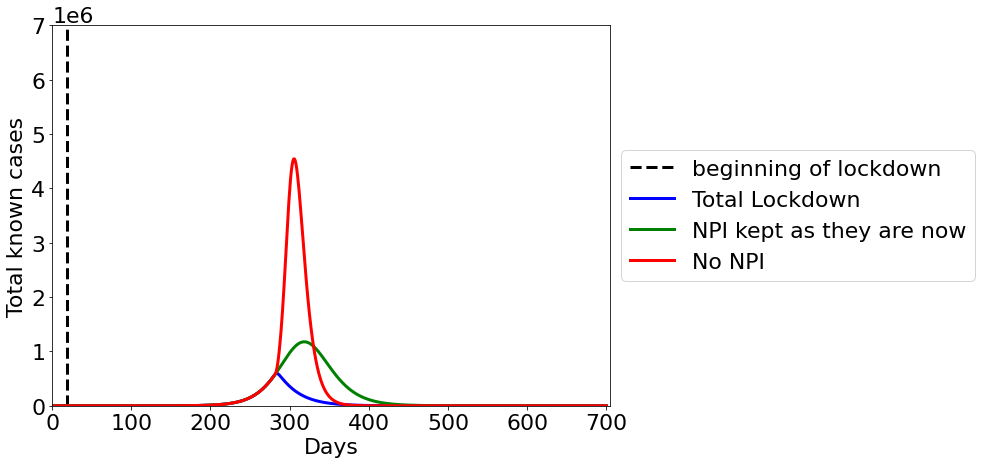

In [21]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.axvline(19,lw=3,ls='--',
           color='black',label='beginning of lockdown')
ax.plot(summedAgesIs_1,lw=3, color = 'blue',
       label='Total Lockdown')
ax.plot(summedAgesIs_2,lw=3, color = 'green',
       label='NPI kept as they are now')
ax.plot(summedAgesIs_3,lw=3, color = 'red',
       label='No NPI')
ax.set_xlabel('Days')
ax.set_ylabel('Total known cases')
ax.set_ylim(0,7e6)
ax.set_xlim(0,705)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('Morroco_predicted_cases_4.pdf',bbox_inches='tight')
plt.show()
plt.close()

 The peak of active cases for the first scenario has already been reached and the epidemic will be resolved by April 5, 2021. For the second scenario, the peak will be reached on January 30, 2021 and there will be no further spread of the virus on April 30, 2021.However for the third scenario, the peak will be reached on December 26, 2020 with 6 million cases, but the spread will stop on February 13, 2021.

## Mortality

In [32]:
MM = np.array((0,0,.2,.2,.2,.2,.2,.2,.4,.4,1.3,1.3,3.6,3.6,8,8))  
## Fatality Rate by AGE per 100 cases

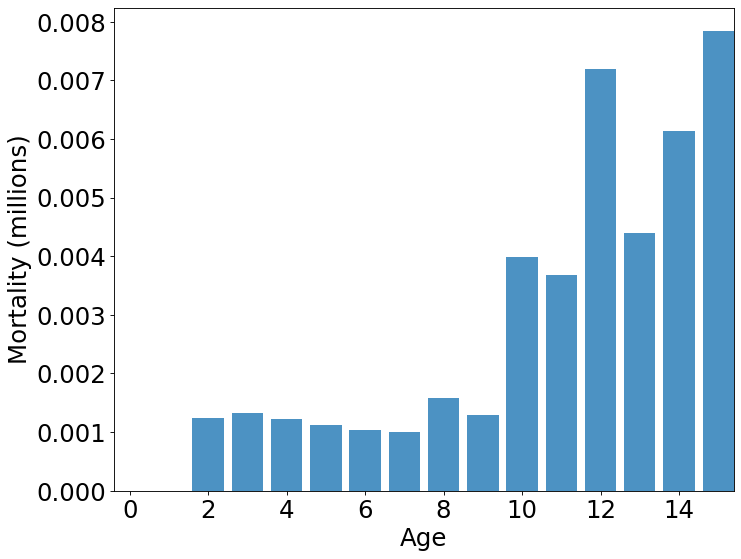

In [33]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

m1 = .01*MM*(data_1['X'][0,0:M]-data_1['X'][-1,0:M])
plt.bar(np.arange(16),m1*10**(-6),   label='susceptible (final)', alpha=0.8)

#plt.axis('tight'); plt.xticks(np.arange(-0.4, 16.45, 3.95), ('0', '20', '40', '60', '80'));
plt.xlim(-0.45, 15.45); plt.ylabel('Mortality (millions)'); plt.xlabel('Age')

plt.autoscale(enable=True, axis='x', tight=True)
fig.savefig('mortality_1.pdf',bbox_inches='tight')

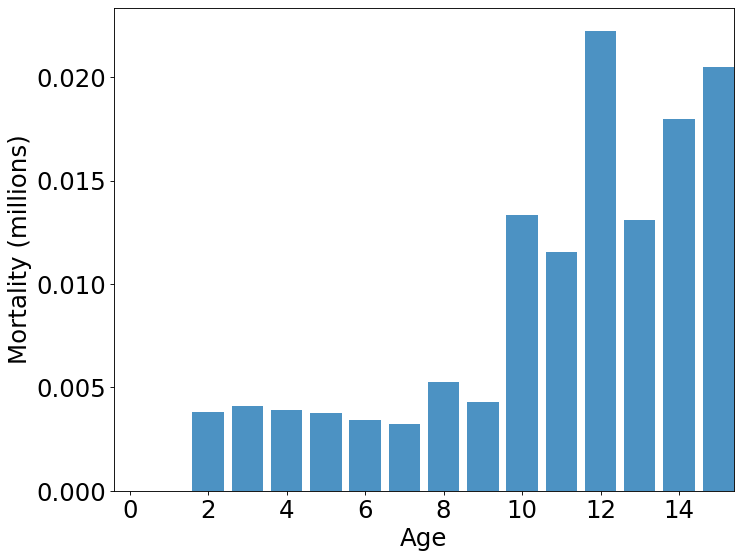

In [34]:

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

m1 = .01*MM*(data_2['X'][0,0:M]-data_2['X'][-1,0:M])
plt.bar(np.arange(16),m1*10**(-6),   label='susceptible (final)', alpha=0.8)
plt.xlim(-0.45, 15.45); plt.ylabel('Mortality (millions)'); plt.xlabel('Age')

plt.autoscale(enable=True, axis='x', tight=True)
fig.savefig('mortality_2.pdf',bbox_inches='tight')

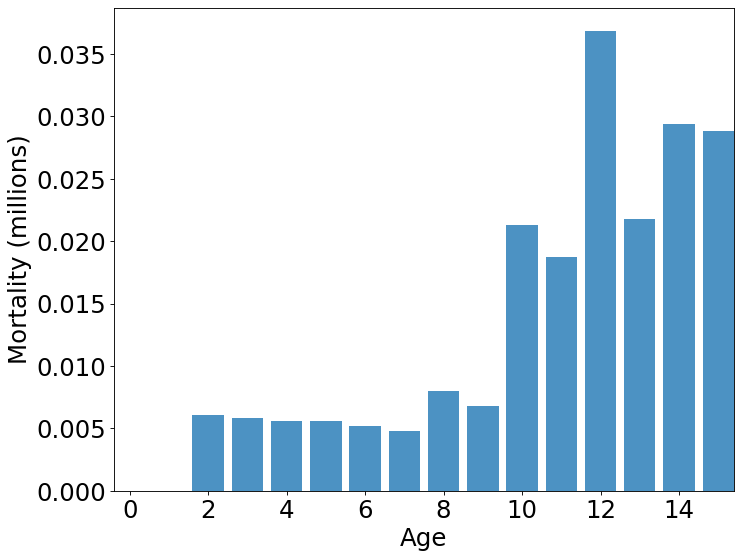

In [35]:

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

m1 = .01*MM*(data_3['X'][0,0:M]-data_3['X'][-1,0:M])
plt.bar(np.arange(16),m1*10**(-6),   label='susceptible (final)', alpha=0.8)
plt.xlim(-0.45, 15.45); plt.ylabel('Mortality (millions)'); plt.xlabel('Age')

plt.autoscale(enable=True, axis='x', tight=True)
fig.savefig('mortality_3.pdf',bbox_inches='tight')

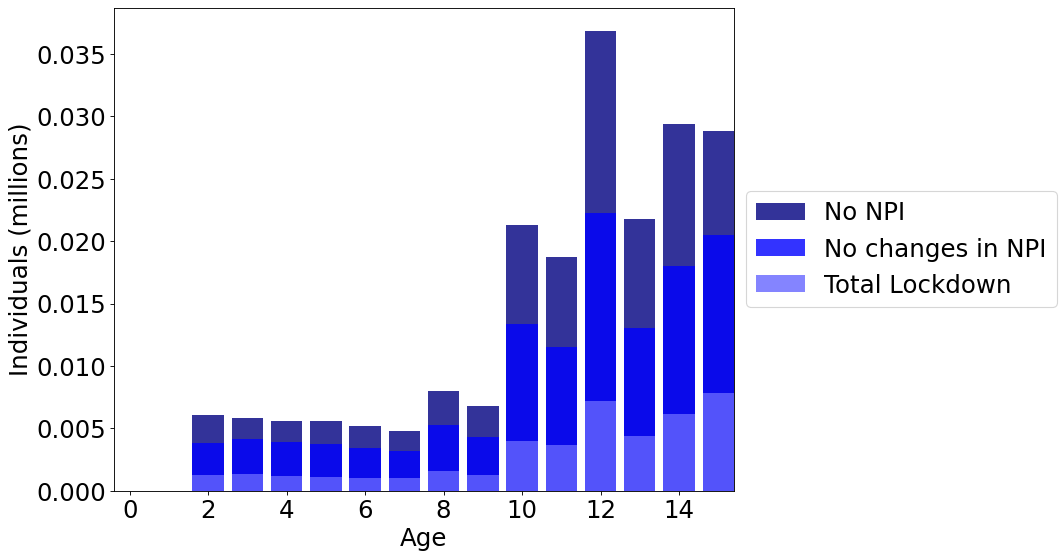

In [36]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

m1 = .01*MM*(data_1['X'][0,0:M]-data_1['X'][-1,0:M])
m2 = .01*MM*(data_2['X'][0,0:M]-data_2['X'][-1,0:M])
m3 = .01*MM*(data_3['X'][0,0:M]-data_3['X'][-1,0:M])

plt.bar(np.arange(16),m3*10**(-6),   label='No NPI', color = '#000080',alpha=0.8)
plt.bar(np.arange(16),m2*10**(-6),   label='No changes in NPI', color = '#0000ff', alpha=0.8)
plt.bar(np.arange(16),m1*10**(-6),   label='Total Lockdown', color = '#6666ff', alpha=0.8)

plt.xlim(-0.45, 15.45); plt.ylabel('Individuals (millions)'); plt.xlabel('Age')
plt.legend(fontsize=22); plt.axis('tight')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('mortality.pdf',bbox_inches='tight')

As expected, most of the death cases are at a later age. Also the number rises if there are fewer non-pharmaceutical interventions.

## R0

In [22]:
x

0.044746452369894635

In [23]:
# matrix for linearised dynamics
beta = x
L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))

for i in range(M):
    for j in range(M):
        L0[i,j]=C[i,j]*Ni[i]/Ni[j]

L[0:M, 0:M]     =    alpha*beta/gIs*L0
L[0:M, M:2*M]   = fsa*alpha*beta/gIs*L0
L[M:2*M, 0:M]   =    ((1-alpha)*beta/gIs)*L0
L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gIs)*L0

r0 = np.max(np.linalg.eigvals(L))
print("The basic reproductive ratio for these parameters is", r0)

The basic reproductive ratio for these parameters is (3.7432333378535647+0j)


(2.870638159529938, 3.843233158596108)

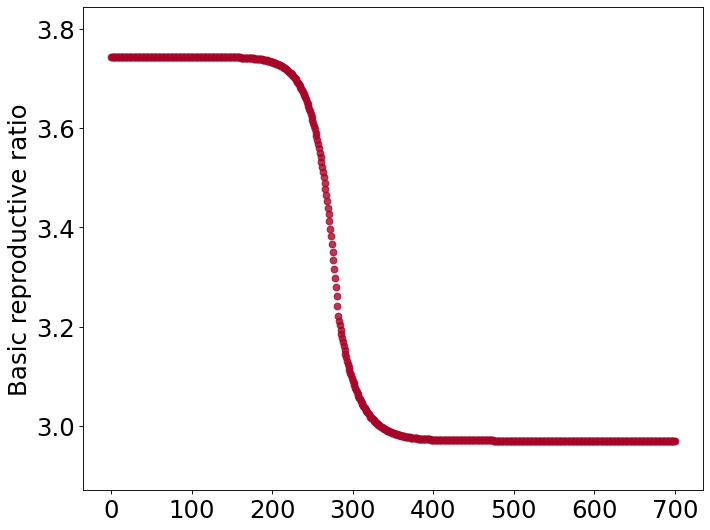

In [24]:
IC  = np.zeros((Nf_1))
SC  = np.zeros((Nf_1))


for i in range(M):
        IC += data_1['X'][:,3*M+i] 
        SC += data_1['X'][:,0*M+i]
        
t = data_1['t']

L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))
xind=[np.argsort(IC)[-1]]
rr_1 = np.zeros((Nf_1))

for tt in range(Nf_1):
    Si = np.array((data_1['X'][tt,0:M])).flatten()
    for i in range(M):
        for j in range(M):
            L0[i,j]=C[i,j]*Si[i]/Ni[j]
    L[0:M, 0:M]     =    alpha*beta/gIs*L0
    L[0:M, M:2*M]   = fsa*alpha*beta/gIs*L0
    L[M:2*M, 0:M]   =    ((1-alpha)*beta/gIs)*L0
    L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gIs)*L0

    rr_1[tt] = np.real(np.max(np.linalg.eigvals(L)))
    
    
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, rr_1, 'o', lw=4, color='#A60628', label='suscetible', alpha=0.8,)
plt.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
plt.ylim(np.min(rr_1)-.1, np.max(rr_1)+.1)

(1.2641761880973812, 3.843233158596108)

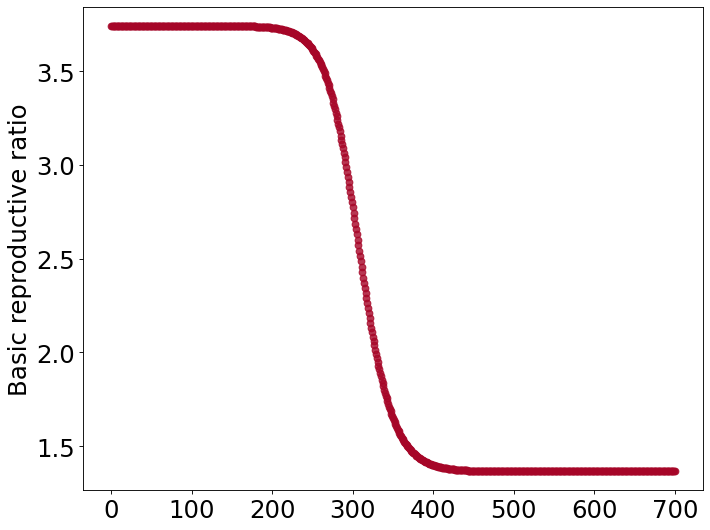

In [25]:
for i in range(M):
        IC += data_2['X'][:,3*M+i] 
        SC += data_2['X'][:,0*M+i]
        
t = data_2['t']

L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))
xind=[np.argsort(IC)[-1]]
rr_2 = np.zeros((Nf_1))

for tt in range(Nf_1):
    Si = np.array((data_2['X'][tt,0:M])).flatten()
    for i in range(M):
        for j in range(M):
            L0[i,j]=C[i,j]*Si[i]/Ni[j]
    L[0:M, 0:M]     =    alpha*beta/gIs*L0
    L[0:M, M:2*M]   = fsa*alpha*beta/gIs*L0
    L[M:2*M, 0:M]   =    ((1-alpha)*beta/gIs)*L0
    L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gIs)*L0

    rr_2[tt] = np.real(np.max(np.linalg.eigvals(L)))
    
    
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, rr_2, 'o', lw=4, color='#A60628', label='suscetible', alpha=0.8,)
plt.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
plt.ylim(np.min(rr_2)-.1, np.max(rr_2)+.1)

(0.11884002019281406, 3.843233158596108)

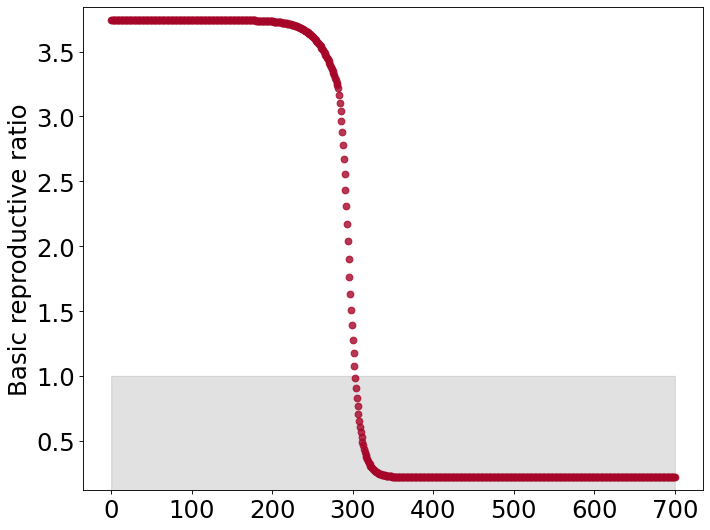

In [26]:
for i in range(M):
        IC += data_3['X'][:,3*M+i] 
        SC += data_3['X'][:,0*M+i]
        
t = data_3['t']

L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))
xind=[np.argsort(IC)[-1]]
rr_3 = np.zeros((Nf_1))

for tt in range(Nf_1):
    Si = np.array((data_3['X'][tt,0:M])).flatten()
    for i in range(M):
        for j in range(M):
            L0[i,j]=C[i,j]*Si[i]/Ni[j]
    L[0:M, 0:M]     =    alpha*beta/gIs*L0
    L[0:M, M:2*M]   = fsa*alpha*beta/gIs*L0
    L[M:2*M, 0:M]   =    ((1-alpha)*beta/gIs)*L0
    L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gIs)*L0

    rr_3[tt] = np.real(np.max(np.linalg.eigvals(L)))
    
    
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, rr_3, 'o', lw=4, color='#A60628', label='suscetible', alpha=0.8,)
plt.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
plt.ylim(np.min(rr_3)-.1, np.max(rr_3)+.1)

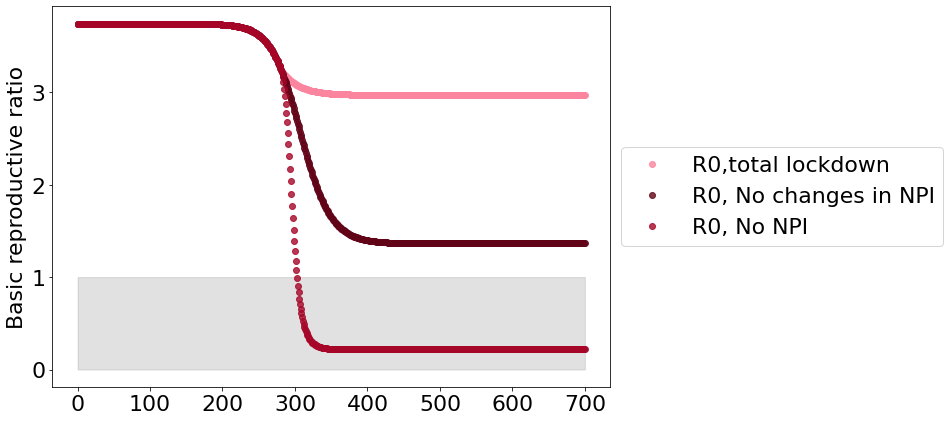

In [27]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
plt.rcParams.update({'font.size': 22})

ax.plot(t, rr_1, 'o', lw=4, color='#fb849e', label='R0,total lockdown', alpha=0.8,)
ax.plot(t, rr_2, 'o', lw=4, color='#620418', label='R0, No changes in NPI', alpha=0.8,)
ax.plot(t, rr_3, 'o', lw=4, color='#A60628', label='R0, No NPI', alpha=0.8,)
ax.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('Morroco_predicted_R0.pdf',bbox_inches='tight')
plt.show()
plt.close()

## Susceptible People

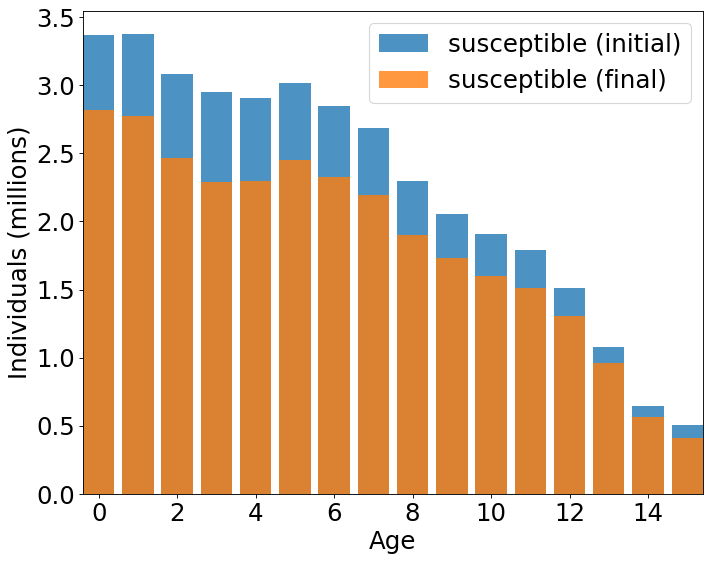

In [28]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.bar(np.arange(16),data_1['X'][0,0:M]*10**(-6),   label='susceptible (initial)', alpha=0.8)
plt.bar(np.arange(16),data_1['X'][-1,0:M]*10**(-6),   label='susceptible (final)', alpha=0.8)
plt.xlim(-0.45, 15.45); plt.ylabel('Individuals (millions)'); plt.xlabel('Age')
plt.legend(fontsize=22); plt.axis('tight')
plt.autoscale(enable=True, axis='x', tight=True)
fig.savefig('susceptible_1.pdf',bbox_inches='tight')

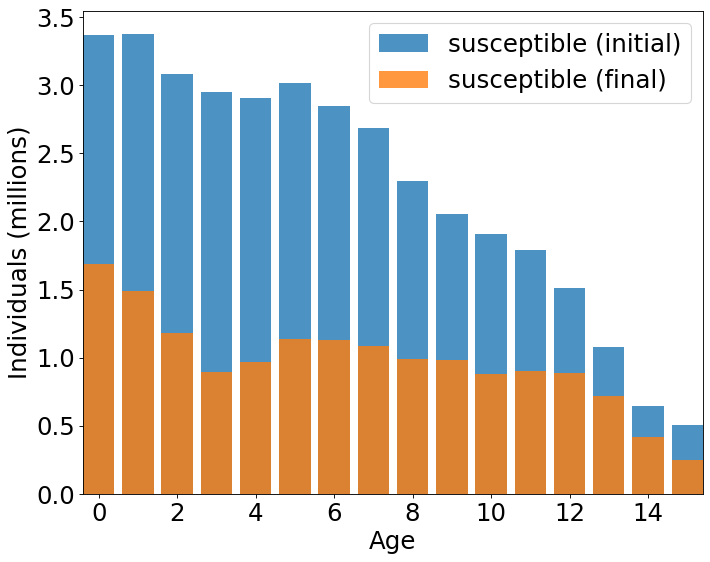

In [29]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.bar(np.arange(16),data_2['X'][0,0:M]*10**(-6),   label='susceptible (initial)', alpha=0.8)
plt.bar(np.arange(16),data_2['X'][-1,0:M]*10**(-6),   label='susceptible (final)', alpha=0.8)
plt.xlim(-0.45, 15.45); plt.ylabel('Individuals (millions)'); plt.xlabel('Age')
plt.legend(fontsize=22); plt.axis('tight')
plt.autoscale(enable=True, axis='x', tight=True)
fig.savefig('susceptible_2.pdf',bbox_inches='tight')

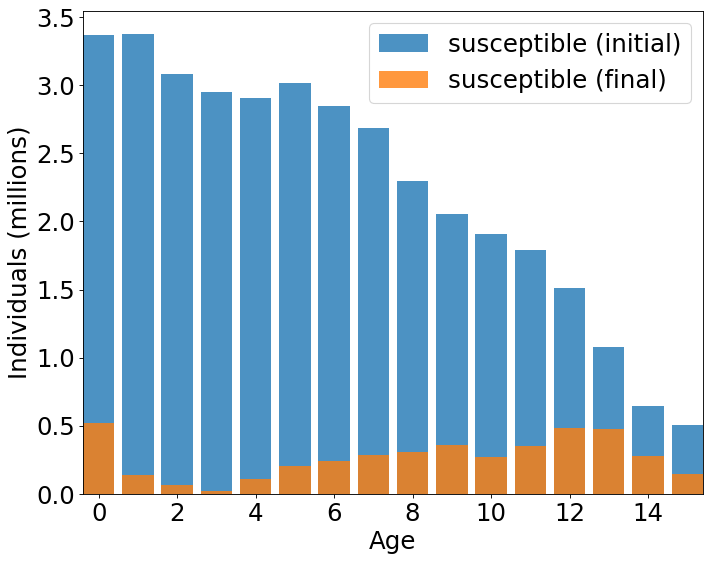

In [30]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.bar(np.arange(16),data_3['X'][0,0:M]*10**(-6),   label='susceptible (initial)', alpha=0.8)
plt.bar(np.arange(16),data_3['X'][-1,0:M]*10**(-6),   label='susceptible (final)', alpha=0.8)

#plt.xticks(np.arange(-0.4, 16.45, 3.95), ('0', '20', '40', '60', '80'));
plt.xlim(-0.45, 15.45); plt.ylabel('Individuals (millions)'); plt.xlabel('Age')
plt.legend(fontsize=22); plt.axis('tight')
plt.autoscale(enable=True, axis='x', tight=True)
fig.savefig('susceptible_2.pdf',bbox_inches='tight')

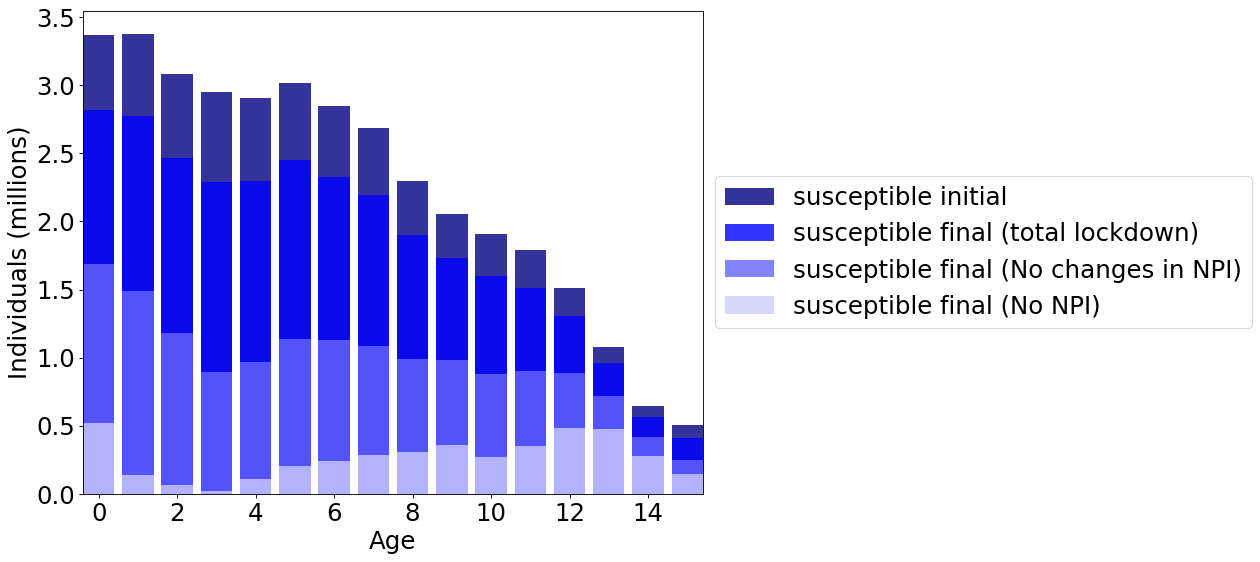

In [31]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.bar(np.arange(16),data_3['X'][0,0:M]*10**(-6),   label='susceptible initial', color = '#000080',alpha=0.8)
plt.bar(np.arange(16),data_1['X'][-1,0:M]*10**(-6),   label='susceptible final (total lockdown)', color = '#0000ff', alpha=0.8)
plt.bar(np.arange(16),data_2['X'][-1,0:M]*10**(-6),   label='susceptible final (No changes in NPI)', color = '#6666ff', alpha=0.8)
plt.bar(np.arange(16),data_3['X'][-1,0:M]*10**(-6),   label='susceptible final (No NPI)', color = '#ccccff', alpha=0.8)
plt.xlim(-0.45, 15.45); plt.ylabel('Individuals (millions)'); plt.xlabel('Age')
plt.legend(fontsize=22); plt.axis('tight')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('susceptible.pdf',bbox_inches='tight')

 The number of susceptible people decreases if there are fewer NPIs and for the third scenario, R0 converges to 0. However, in the case of total containment, R0 remains high. After this analysis, a hypothesis can be made about the three scenarios: 
- There is a strong chance that there will be a second wave in the first and second scenario, because there is a very large number of susceptible people and the ratio R0 is still higher than 1.
- In the case of the third scenario, the virus will not spread more.

## After The NPI Period

To validate our hypothesis, we made a simulation with our model validated after the 700 days studied by taking no INP taken by the state . That is to say that the contact matrix for the three scenarios will be equal to C. The different contact matrices are as follows:

In [37]:
model_2 = pyross.deterministic.SEIR(parameters, M, Ni)

#1st Simulation
def contactMatrix4(t):
    if 0 <= t <= 20 :
        return C
    elif 20 < t <= 110 :
        return CH+0.4*CW+0.11*CO
    elif 110 < t <= 282 :
        return CH+0.7*CW+0.3*CO+ 0.1*CS
    elif 282 < t <= 701:
        return CH
    elif t > 701:
        return C
    
#2nd Simulation
def contactMatrix5(t):
    if 0 <= t <= 20 :
        return C
    elif 20 < t <= 110 :
        return CH+0.4*CW+0.11*CO
    elif 110 < t <= 701 :
        return CH+0.7*CW+0.3*CO+ 0.1*CS
    elif t > 701:
        return C

#3rd Simulation
def contactMatrix6(t):
    if 0 <= t <= 20 :
        return C
    elif 20 < t <= 110 :
        return CH+0.4*CW+0.11*CO
    elif 110 < t <= 282 :
        return CH+0.7*CW+0.3*CO+ 0.1*CS
    elif t > 282:
        return C
    
Tf_2 = 1400
Nf_2 = Tf_2+1

In [38]:
data_4=model_2.simulate(S_0, E_0,  Ia_0, Is_0,  contactMatrix4, Tf_2, Nf_2)
data_5=model_1.simulate(S_0, E_0,  Ia_0, Is_0,  contactMatrix5, Tf_2, Nf_2)
data_6=model_1.simulate(S_0, E_0,  Ia_0, Is_0,  contactMatrix6, Tf_2, Nf_2)

In [39]:
Is_4 = (model_2.Is(data_4))
summedAgesIs_4 = Is_4.sum(axis=1)

Is_5 = (model_2.Is(data_5))
summedAgesIs_5 = Is_5.sum(axis=1)

Is_6 = (model_2.Is(data_6))
summedAgesIs_6 = Is_6.sum(axis=1)

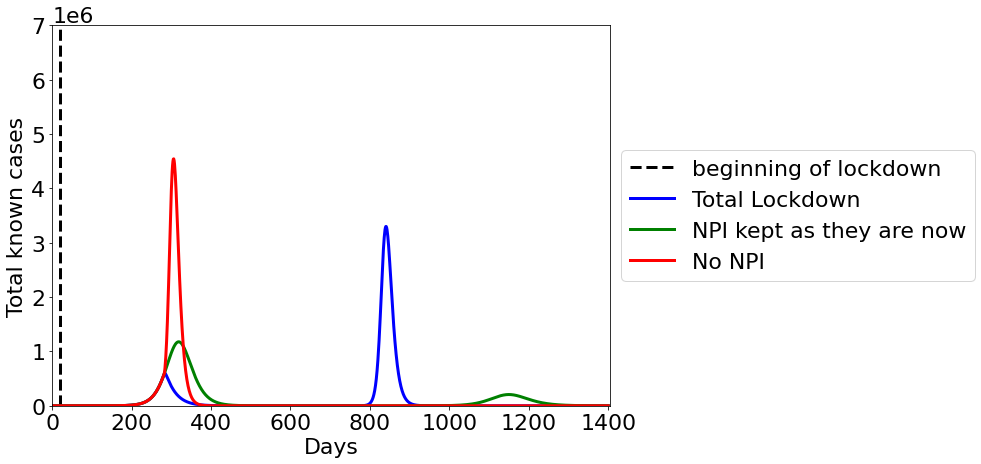

In [40]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.axvline(19,lw=3,ls='--',
           color='black',label='beginning of lockdown')
ax.plot(summedAgesIs_4,lw=3, color = 'blue',
       label='Total Lockdown')
ax.plot(summedAgesIs_5,lw=3, color = 'green',
       label='NPI kept as they are now')
ax.plot(summedAgesIs_6,lw=3, color = 'red',
       label='No NPI')
ax.set_xlabel('Days')
ax.set_ylabel('Total known cases')
ax.set_ylim(0,7e6)
ax.set_xlim(0,1405)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('Morroco_predicted_cases_5.pdf',bbox_inches='tight')
plt.show()
plt.close()

The simulation affirms our hypothesis. In the first two scenarios, Morocco will face a second wave instead of the third scenario. We also notice that the peak of the first scenario is faster and higher than the second. A total lockdown would be beneficial at the beginning, but there are risks of several waves. "Semi-confinement" allows us to control the epidemic and let it circulate among the population to acquire immunity, and therefore the second wave would be less dangerous and more controllable. So it is preferable that Morocco take the second scenario, which would be more favorable for the state and for its economy.